<a href="https://colab.research.google.com/github/Andreaierardi/Appunti-Triennale-Informatica/blob/master/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [42]:
!kaggle datasets download --force -d moltean/fruits

100% 758M/760M [00:06<00:00, 88.2MB/s]
100% 760M/760M [00:06<00:00, 120MB/s] 


In [43]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg

# Image classification with Neural Networks
## Machine Learning Project

Group: Andrea Ierardi, Emanuele Morales, Gregorio Luigi Saporito


## 1. The dataset
### 1.1 Libraries


In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import pandas as pd 


from sklearn.datasets import load_files
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils

Using TensorFlow backend.


## 1.2 Data Loading

In [46]:
DATADIR = "/content/gdrive/My Drive/Kaggle/fruits-360/Training"
DATADIR_test = "/content/gdrive/My Drive/Kaggle/fruits-360/Test"

TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits = {}
def load_dataset(dire):
    fruits = {}
    images_as_array = []
    labels =[]
    for category in tqdm(os.listdir(dire)):
        for typ in TYPES:
            if(category.split()[0] == typ):
               # print(category, typ)
                fruits[category]= typ
                path = os.path.join(dire,category)
                class_num =TYPES.index(fruits[category])

                class_name = fruits[category]
                for img in tqdm(os.listdir(path)):
                   # print("OK: ",os.path.join(path,img) )
                    file = os.path.join(path,img)
                    #print(file, " -- ", dataset)
                    images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
                    labels.append(class_num)
    images_as_array =  np.array(images_as_array)
    labels = np.array(labels)
    return images_as_array, labels

### Split in test and training sets




In [47]:
train = load_dataset(DATADIR)
test = load_dataset(DATADIR_test)

100%|██████████| 246/246 [00:00<00:00, 589.79it/s]

100%|██████████| 164/164 [00:00<00:00, 614.85it/s]

100%|██████████| 164/164 [00:00<00:00, 395.77it/s]

100%|██████████| 232/232 [00:00<00:00, 403.15it/s]

100%|██████████| 131/131 [00:24<00:00,  5.32it/s]


In [48]:
x_train, y_train= train

In [49]:
x_test, y_test = test

### Train and test shape


In [50]:
print('Train shape:')
print('X: ',x_train.shape)
print('y: ',y_train.shape)

print('Test shape')
print('X: ',x_test.shape)
print('y: ',y_test.shape)

Train shape:
X:  (32607, 32, 32, 3)
y:  (32607,)
Test shape
X:  (10906, 32, 32, 3)
y:  (10906,)


## 1.2 Pre-processing

### Pre-process the labels and the images


In [51]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [52]:
print(y_train[0:10])
print("Number of classes: ",no_of_classes)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Number of classes:  10


### Visualisation of the first 10 images


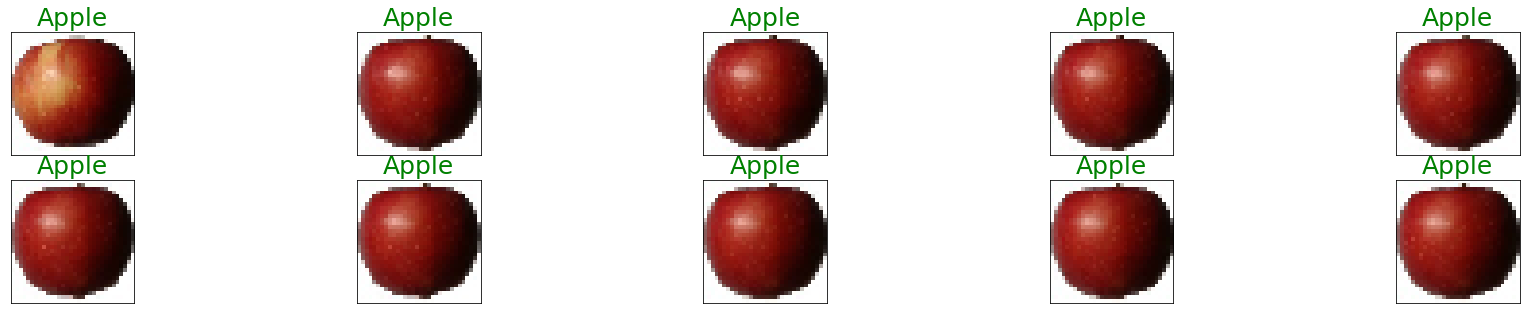

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Suffle of the data


In [54]:
from sklearn.utils import shuffle
import numpy as np
x_train,y_train = shuffle(x_train, y_train)
x_test,y_test = shuffle(x_test, y_test)

### Visualisation of the first 10 images shuffled


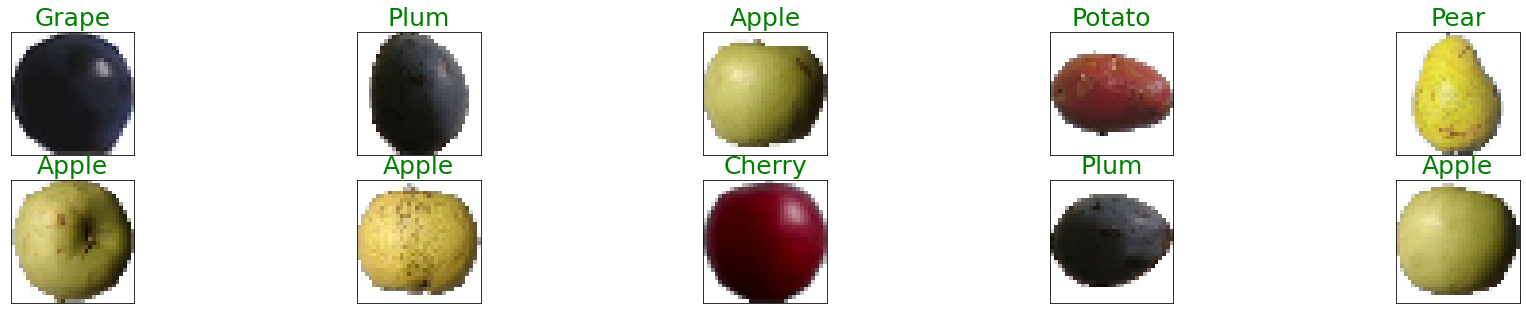

In [55]:


import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})



### Split in validation and test set


In [56]:
# Using 80-20 rule
split = len(x_test)*80//100

print('Test len before split: ',len(x_test))
print('Validation split len:', split)

Test len before split:  10906
Validation split len: 8724


In [57]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[split:],x_test[:split]
y_test,y_vaild = y_test[split:],y_test[:split]
print('Train X : ',x_train.shape)
print('Train y :',y_train.shape)

print('1st training image shape ',x_train[0].shape)

print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Train X :  (32607, 32, 32, 3)
Train y : (32607, 10)
1st training image shape  (32, 32, 3)
Vaildation X :  (8724, 32, 32, 3)
Vaildation y : (8724, 10)
Test X :  (2182, 32, 32, 3)
Test y :  (2182, 10)


# 1.3  Convolutional Neural Newtworks

## First Approach


In [58]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(32,32,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

In [59]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [60]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )

Train on 32607 samples, validate on 8724 samples
Epoch 1/10
 - 35s - loss: 0.8005 - accuracy: 0.7190 - val_loss: 0.2080 - val_accuracy: 0.9261
Epoch 2/10
 - 35s - loss: 0.1365 - accuracy: 0.9549 - val_loss: 0.1782 - val_accuracy: 0.9472
Epoch 3/10
 - 38s - loss: 0.0615 - accuracy: 0.9792 - val_loss: 0.0505 - val_accuracy: 0.9829
Epoch 4/10
 - 38s - loss: 0.0389 - accuracy: 0.9875 - val_loss: 0.0700 - val_accuracy: 0.9725
Epoch 5/10
 - 35s - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.2071 - val_accuracy: 0.9627
Epoch 6/10
 - 36s - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0686 - val_accuracy: 0.9797
Epoch 7/10
 - 35s - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0449 - val_accuracy: 0.9875
Epoch 8/10
 - 35s - loss: 0.0212 - accuracy: 0.9939 - val_loss: 0.0293 - val_accuracy: 0.9899
Epoch 9/10
 - 35s - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0270 - val_accuracy: 0.9924
Epoch 10/10
 - 42s - loss: 0.0187 - accuracy: 0.9946 - val_loss: 0.0498 - val_accuracy: 0.9869


In [62]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])




 Test accuracy: 0.9844179749488831


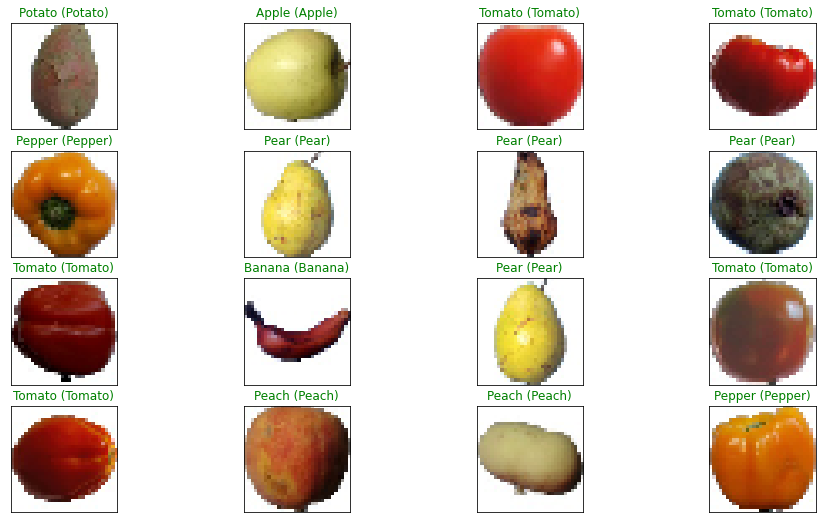

In [63]:


y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



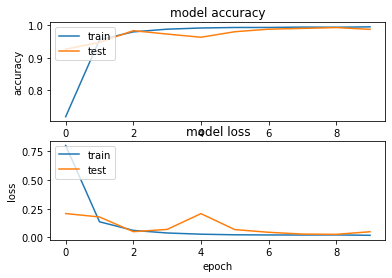

In [64]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

### Parameters Tuning


In [ ]:
from datetime import datetime
from keras.callbacks import TensorBoard

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, 2, input_shape=(32,32,3),padding='same'))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=2))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, 2))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=2))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10,activation = 'softmax'))
    

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
            #
            #!
            #categorical_crossentropy
            #!
            #
            model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
            print('Compiled!')
            
            history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
        callbacks=[tensorboard]
        )

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#  1.4 MobileNetV2


In [65]:
from keras.applications import MobileNetV2

model = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None,classes=10)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
print('Compiled!')

Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [ ]:


history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )



Train on 32607 samples, validate on 8724 samples
Epoch 1/10


In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

In [ ]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
#Finally lets visualize the loss and accuracy wrt epochs

plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 1.5 LeNet Neural Networks


In [ ]:
#leNet Neural Network

input_shape = (32,32,3)
num_classes = 10
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

In [ ]:


history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data=(x_valid, y_vaild),
                    verbose = 2
                    )



In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

In [ ]:


y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



In [ ]:
#plots

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()